In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

np.random.seed(0)

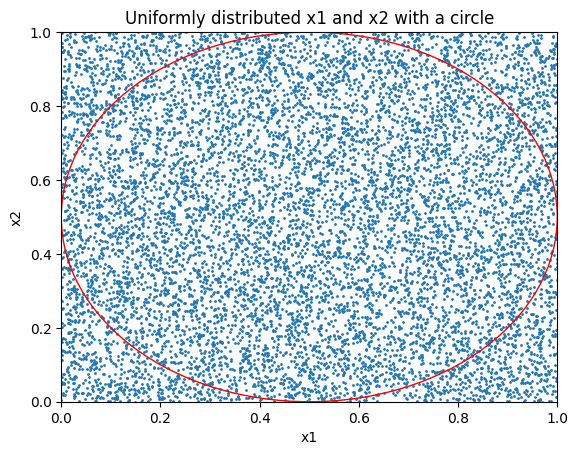

In [3]:
# Generate 10,000 samples of x1 and x2 pairs
x1 = np.random.uniform(0, 1, 10000)
x2 = np.random.uniform(0, 1, 10000)

fig, ax = plt.subplots()
ax.scatter(x1, x2, s=1)

circle = Circle((0.5, 0.5), 0.5, edgecolor='r', facecolor='none')
ax.add_patch(circle)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Uniformly distributed x1 and x2 with a circle')
plt.show()

In [4]:
# Calculate the distance of each point from the center of the circle
distances = np.sqrt((x1 - 0.5)**2 + (x2 - 0.5)**2)

# Count the number of points inside the circle
inside_circle = np.sum(distances <= 0.5)

# Count the number of points outside the circle
outside_circle = np.sum(distances > 0.5)

# Calculate the ratio
ratio = inside_circle / (outside_circle+inside_circle)

print('Ratio', ratio)
ratio

pi_estimate = 4 * ratio
print('Estimated value of pi:', pi_estimate)

Ratio 0.7767
Estimated value of pi: 3.1068


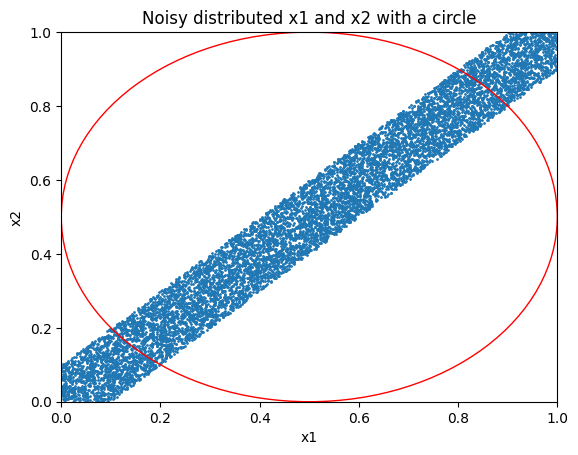

In [5]:
# Generate 10,000 samples of x1 and x2 pairs
x1 = np.random.uniform(0, 1, 10000)
x2 = x1+np.random.uniform(-0.1,0.1, 10000)

fig, ax = plt.subplots()
ax.scatter(x1, x2, s=1)

circle = Circle((0.5, 0.5), 0.5, edgecolor='r', facecolor='none')
ax.add_patch(circle)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Noisy distributed x1 and x2 with a circle')
plt.show()

In [6]:
# Calculate the distance of each point from the center of the circle
distances = np.sqrt((x1 - 0.5)**2 + (x2 - 0.5)**2)

# Count the number of points inside the circle
inside_circle = np.sum(distances <= 0.5)

# Count the number of points outside the circle
outside_circle = np.sum(distances > 0.5)

# Calculate the ratio
ratio = inside_circle / (outside_circle+inside_circle)

ratio
print('Ratio', ratio)

pi_estimate = 4 * ratio
print('Estimated value of pi:', pi_estimate)



Ratio 0.7021
Estimated value of pi: 2.8084


In [7]:
E_R=0*0.35+5*0.3+10*0.25+20*0.1
print('expected value of R:', E_R)

expected value of R: 6.0


In [8]:
E_S=0*0.3+5*0.35+10*0.3+20*0.05
print('expected value of S:', E_S)

expected value of S: 5.75


In [9]:
# Sample 10000 rewards from S
sampled_rewards = np.random.choice([0, 5, 10, 20], size=10000, p=[0.3, 0.35, 0.3, 0.05])

# Compute the empirical expectation E_emp_S
E_emp_S = np.mean(sampled_rewards)

print('Empirical expected value of S:', E_emp_S)


Empirical expected value of S: 5.721
